In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# all columns are numerical (categorical columns have been converted)
df = pd.read_csv('df.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [3]:
# for predicting shipping on time and late delivery 
df = pd.read_csv('df_ontime_vs_late.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df = df.drop(columns=[
    'Late_delivery_risk'
], axis=1)

In [5]:
df_obj = df.select_dtypes(include='object')
df_obj.drop(columns=['Delivery Status'], axis=1, inplace=True)

In [6]:
#one hot encoder
def onehotencoder(col):
    
    ohe = OneHotEncoder()
    ohe_array = ohe.fit_transform((pd.DataFrame(col))).toarray()

    feature_labels = np.array(ohe.categories_).ravel()


    df_obj = pd.DataFrame(ohe_array, columns=feature_labels)
    
    return df_obj

In [7]:
df_ohe = pd.DataFrame()
for c in df_obj.columns:
    one_hot = onehotencoder(df_obj[c])
    df_ohe = pd.concat([df_ohe, one_hot], axis=1) 

In [8]:
df_cont_var = df.select_dtypes(exclude='object')

In [9]:
df_ohe = pd.concat([df_cont_var, df_ohe], axis=1)

In [10]:
df_ohe.dropna(inplace=True)

In [11]:
# y variable values set equal to label encode the dataframes column being used for y
le = LabelEncoder()
y = le.fit_transform(df['Delivery Status'])

In [12]:
# x variable
X = df_ohe

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

### SMOTE

In [14]:
# scaling data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
scaler_x_train = scaler.transform(X_train)

In [16]:
scaler.fit(X_test)
scaler_x_test = scaler.transform(X_test)

In [17]:
# Synthetic minority over sampling
smote =  SMOTE()
x_smote_train, y_smote_train = smote.fit_resample(scaler_x_train, y_train)

##### Logistic Regression Models

##### Training Model

In [18]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(x_smote_train, y_smote_train)
lr_pred_train = logistic_regression.predict(x_smote_train)

In [19]:
print(classification_report(y_smote_train, lr_pred_train,  target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.85      0.56      0.67     79027
Shipping on time       0.67      0.90      0.77     79027

        accuracy                           0.73    158054
       macro avg       0.76      0.73      0.72    158054
    weighted avg       0.76      0.73      0.72    158054



In [20]:
print('Mean Absolute Error:', mean_absolute_error(y_smote_train, lr_pred_train))
print('Mean Squared Error:', mean_squared_error(y_smote_train, lr_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_smote_train, lr_pred_train)))

Mean Absolute Error: 0.27124906677464666
Mean Squared Error: 0.27124906677464666
Root Mean Squared Error: 0.5208157704742116


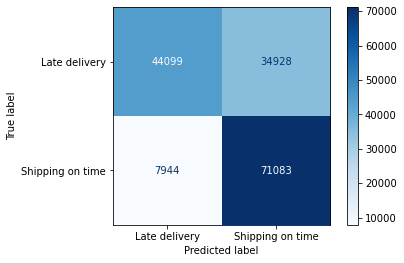

In [21]:
plot_confusion_matrix(logistic_regression, x_smote_train, y_smote_train,
                      cmap=plt.cm.Blues)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

##### Testing Model

In [22]:
lr_pred_test = logistic_regression.predict(scaler_x_test)

In [23]:
print(classification_report(y_test, lr_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.88      0.56      0.68     19949
Shipping on time       0.60      0.89      0.71     14604

        accuracy                           0.70     34553
       macro avg       0.74      0.72      0.70     34553
    weighted avg       0.76      0.70      0.70     34553



In [24]:
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lr_pred_test)))

Mean Absolute Error: 0.301131594941105
Mean Squared Error: 0.301131594941105
Root Mean Squared Error: 0.5487545853485919


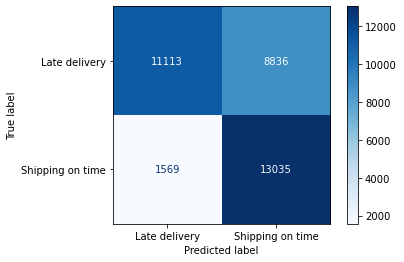

In [25]:
plot_confusion_matrix(logistic_regression, scaler_x_test, y_test,
                      cmap=plt.cm.Blues)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

#### Random Forest Models

##### Training Models

In [26]:
rfc = RandomForestClassifier()
rfc.fit(x_smote_train, y_smote_train)
rfc_pred_train = rfc.predict(x_smote_train)

In [27]:
print(classification_report(y_smote_train, rfc_pred_train,  target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       1.00      1.00      1.00     79027
Shipping on time       1.00      1.00      1.00     79027

        accuracy                           1.00    158054
       macro avg       1.00      1.00      1.00    158054
    weighted avg       1.00      1.00      1.00    158054



In [28]:
print('Mean Absolute Error:', mean_absolute_error(y_smote_train, rfc_pred_train))
print('Mean Squared Error:', mean_squared_error(y_smote_train, rfc_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_smote_train, rfc_pred_train)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


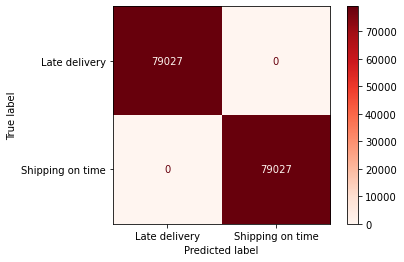

In [29]:
plot_confusion_matrix(rfc, x_smote_train, y_smote_train,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

##### Testing Model

In [30]:
rfc_pred_test = rfc.predict(scaler_x_test)

In [31]:
print(classification_report(y_test, rfc_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       1.00      0.27      0.43     19949
Shipping on time       0.50      1.00      0.67     14604

        accuracy                           0.58     34553
       macro avg       0.75      0.63      0.55     34553
    weighted avg       0.79      0.58      0.53     34553



In [32]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfc_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, rfc_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfc_pred_test)))

Mean Absolute Error: 0.4214395276821115
Mean Squared Error: 0.4214395276821115
Root Mean Squared Error: 0.6491837395392089


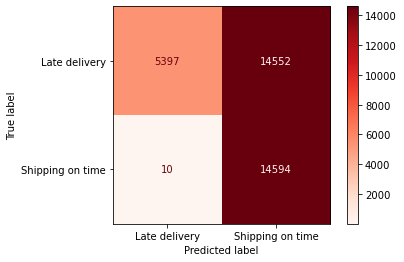

In [33]:
plot_confusion_matrix(rfc, scaler_x_test, y_test,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

#### XGBoost

##### Training Model

In [34]:
xgb = XGBClassifier()
xgb.fit(x_smote_train, y_smote_train)
xgb_pred_train = xgb.predict(x_smote_train)

[23:31:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
print(classification_report(y_smote_train, xgb_pred_train,  target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.89      0.65      0.75     79027
Shipping on time       0.72      0.92      0.81     79027

        accuracy                           0.78    158054
       macro avg       0.80      0.78      0.78    158054
    weighted avg       0.80      0.78      0.78    158054



In [36]:
print('Mean Absolute Error:', mean_absolute_error(y_smote_train, xgb_pred_train))
print('Mean Squared Error:', mean_squared_error(y_smote_train, xgb_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_smote_train, xgb_pred_train)))

Mean Absolute Error: 0.21676768699305302
Mean Squared Error: 0.21676768699305302
Root Mean Squared Error: 0.4655831687175268


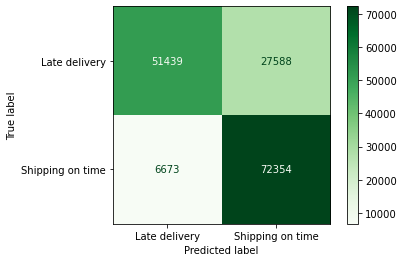

In [37]:
plot_confusion_matrix(xgb, x_smote_train, y_smote_train,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

##### Testing Model

In [38]:
xgb_pred_test = xgb.predict(scaler_x_test)

In [39]:
print(classification_report(y_test, xgb_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       1.00      0.27      0.42     19949
Shipping on time       0.50      1.00      0.67     14604

        accuracy                           0.58     34553
       macro avg       0.75      0.63      0.54     34553
    weighted avg       0.79      0.58      0.53     34553



In [40]:
print('Mean Absolute Error:', mean_absolute_error(y_test, xgb_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, xgb_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgb_pred_test)))

Mean Absolute Error: 0.42262611061268196
Mean Squared Error: 0.42262611061268196
Root Mean Squared Error: 0.650097000925771


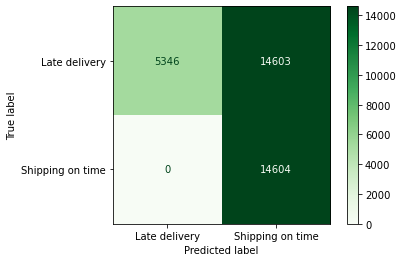

In [41]:
plot_confusion_matrix(xgb, scaler_x_test, y_test,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

SMOTE Does not work well with this modeling because Advanced Shipping and On Time data points are too similar.

After combining delivery status of Advanced Shipping and Shipping on time, SMOTE did not see to help the models increase efficiency. 